<a href="https://colab.research.google.com/github/coder-247/B-3_1/blob/main/B_3_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/My Drive/Colab Notebooks/B-3')

Mounted at /content/gdrive


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
df_student = pd.read_csv('./student-mat.csv')
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df_student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df_student.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [ ]:
df_student.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

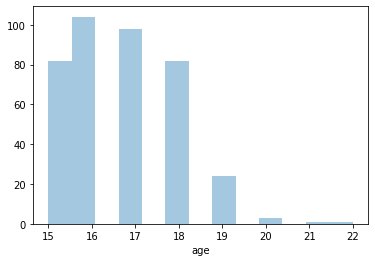

In [ ]:
sns.distplot(df_student['age'], hist=True, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


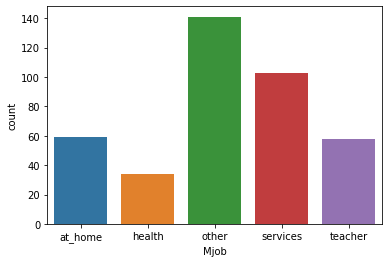

In [ ]:
sns.countplot('Mjob',data=df_student)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


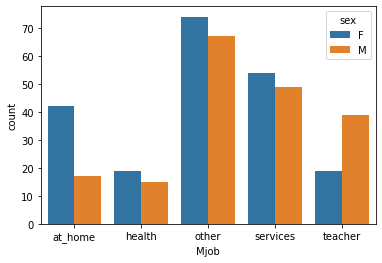

In [ ]:
sns.countplot('Mjob', hue='sex', data=df_student)

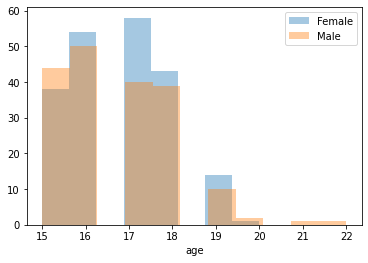

In [ ]:
sns.distplot(df_student['age'].loc[ df_student['sex']=='F'], kde=False, label='Female')
sns.distplot(df_student ['age'].loc[ df_student['sex']=='M'], kde=False, label='Male')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


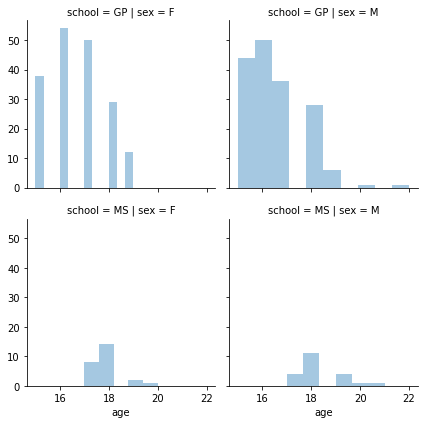

In [ ]:
grid = sns.FacetGrid(df_student, col='sex',row='school')
grid.map(sns.distplot, 'age', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


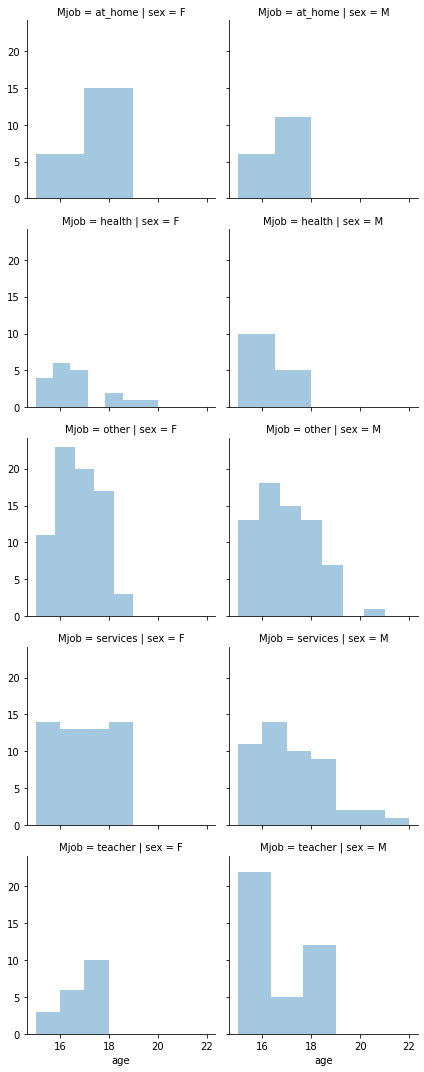

In [ ]:
grid = sns.FacetGrid(df_student, col='sex',row='Mjob')
grid.map(sns.distplot, 'age', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


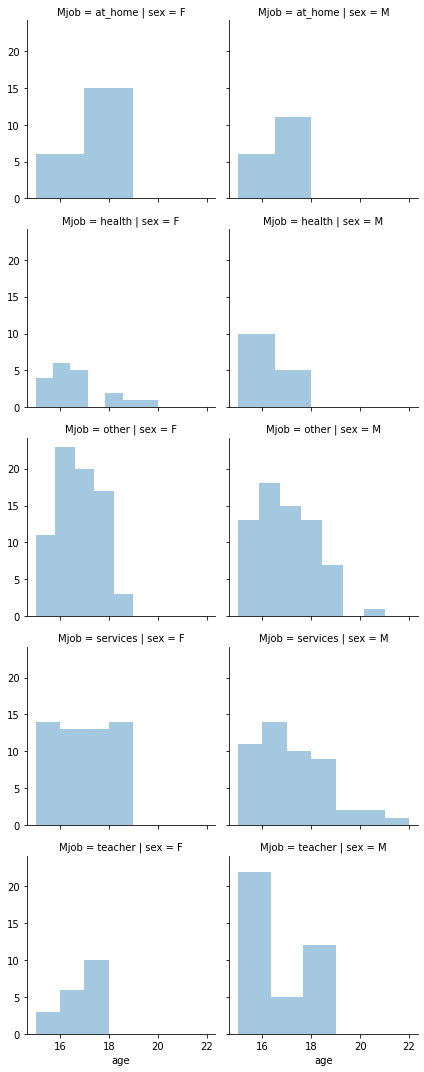

In [ ]:
grid = sns.FacetGrid(df_student, col='sex',row='Mjob')
grid.map(sns.distplot, 'age', kde=False)

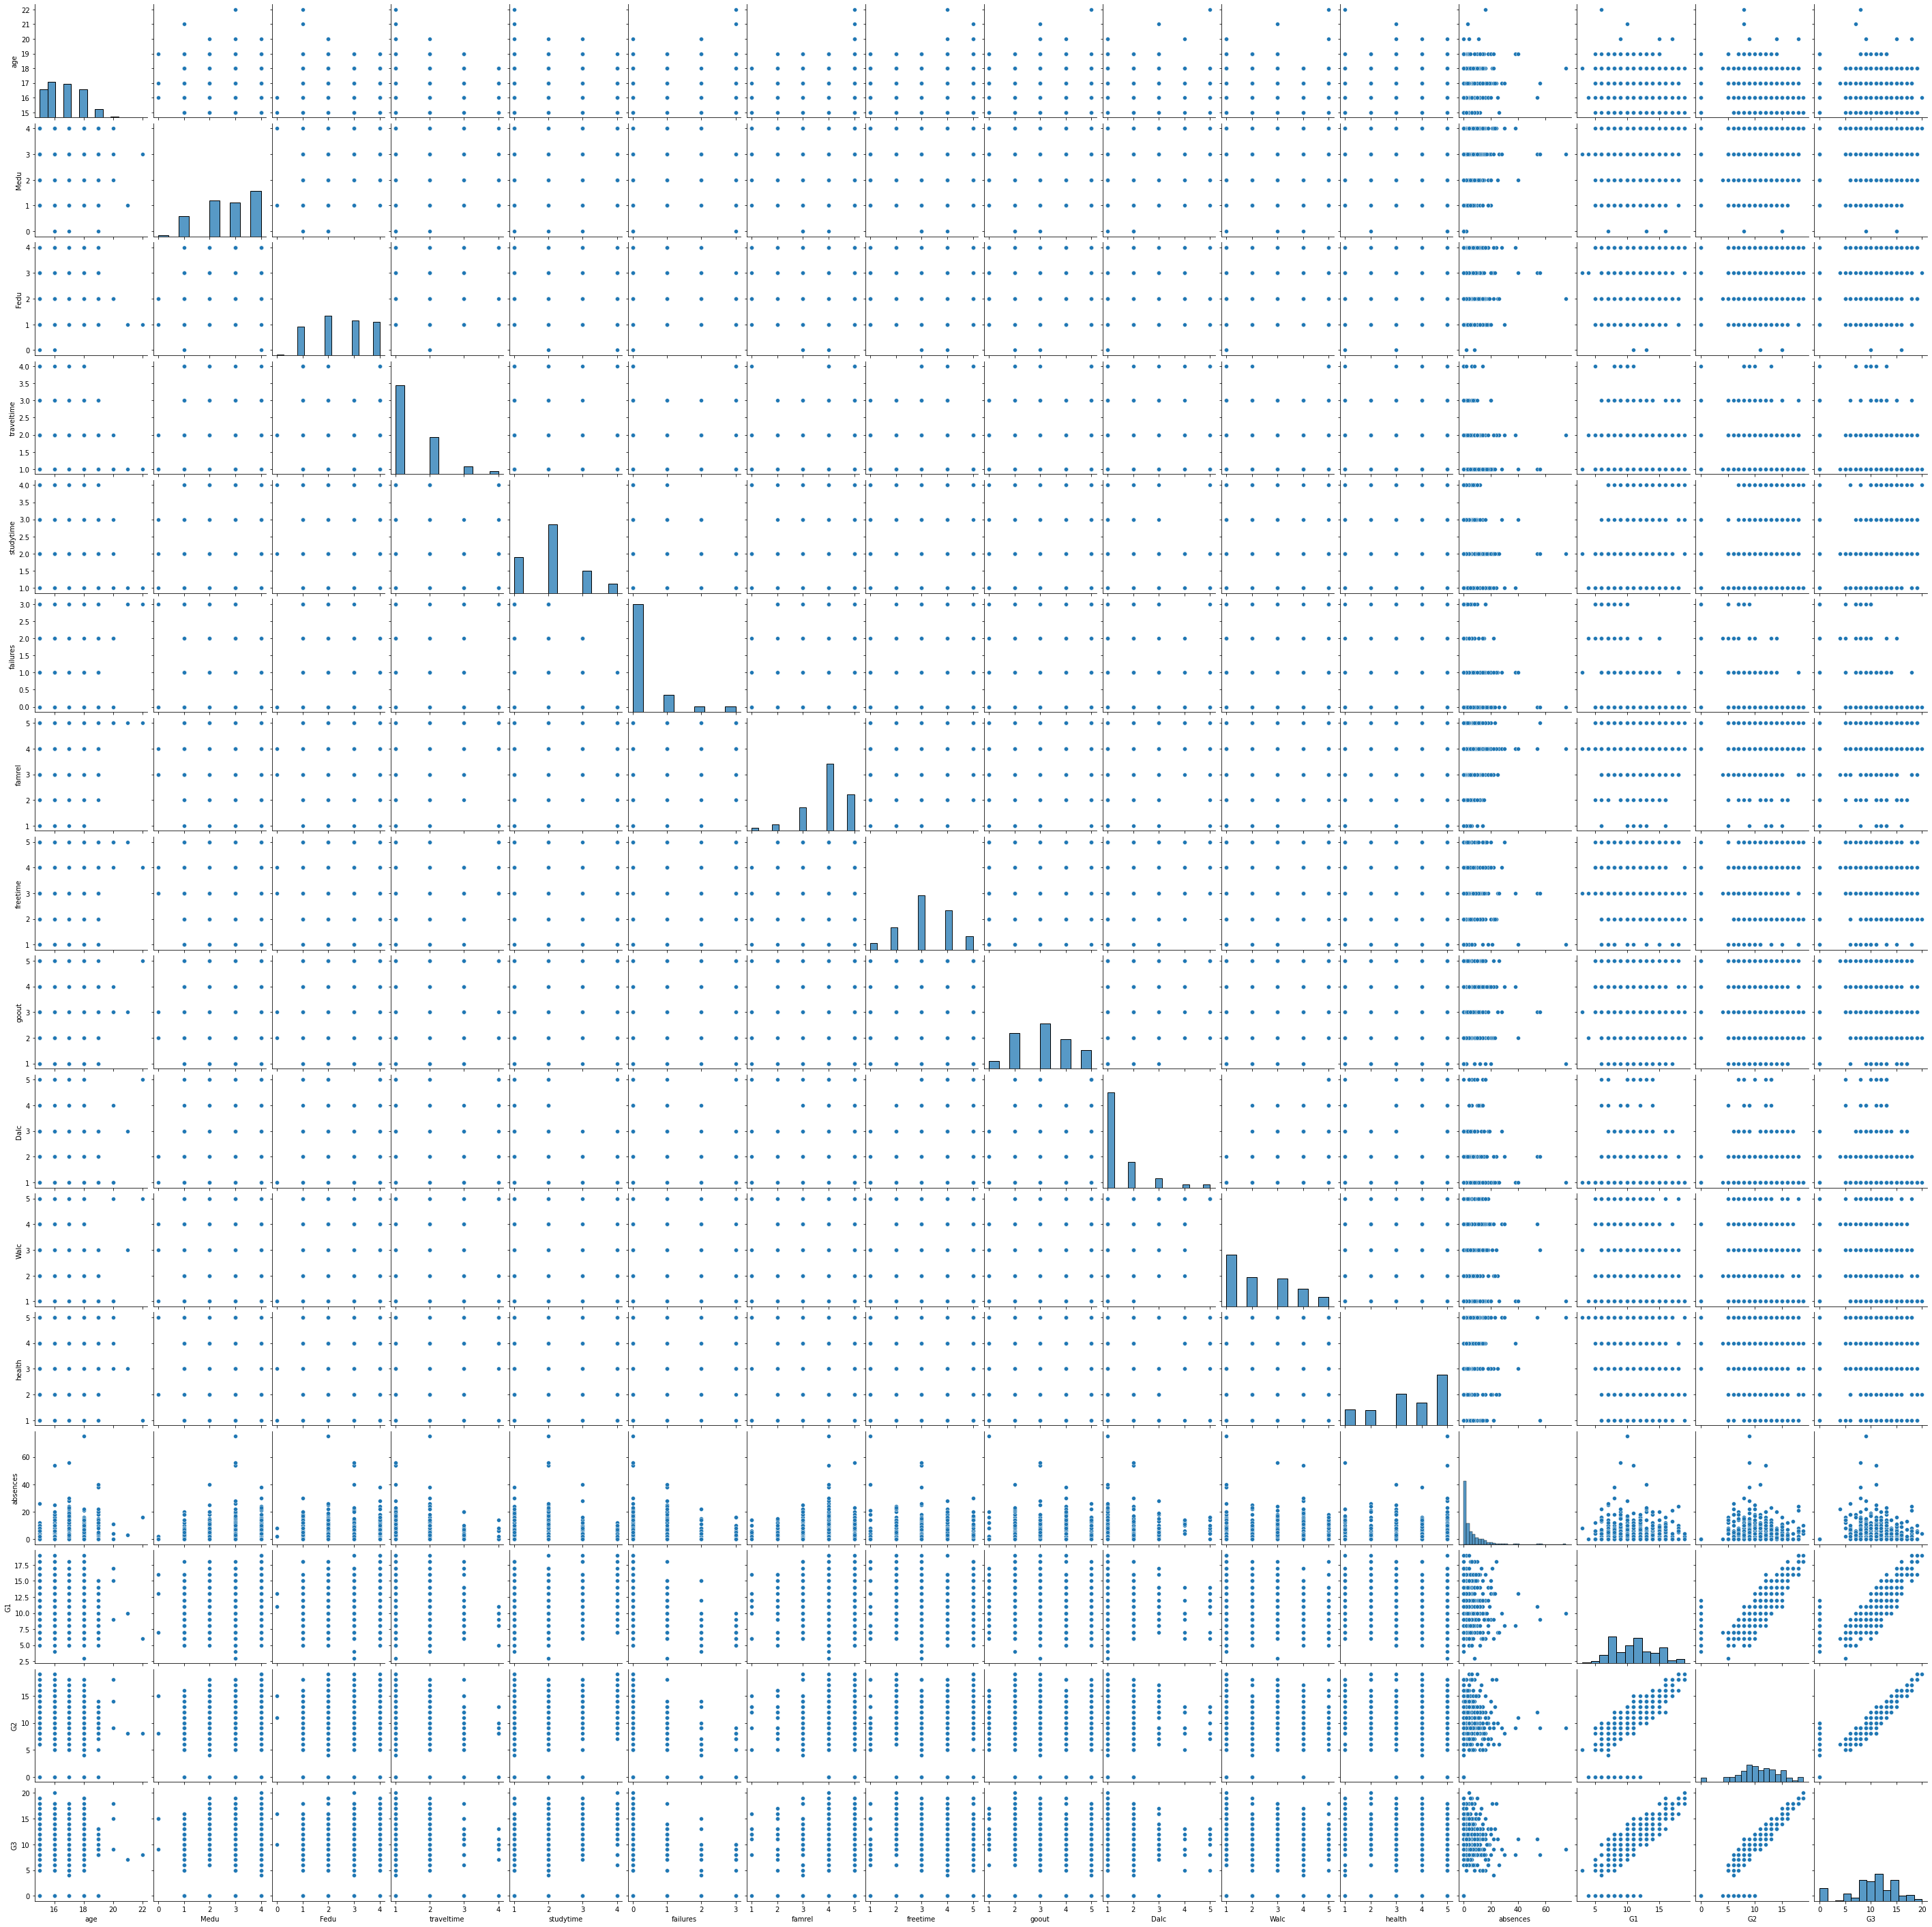

In [ ]:
sns.pairplot(df_student)

In [ ]:
df_student_small = df_student [ ['school', 'age', 'sex', 'Mjob', 'Fjob', 'studytime', 'failures','G3']]
df_student_small.head()

,school,age,sex,Mjob,Fjob,studytime,failures,G3
0,GP,18,F,at_home,teacher,2,0,6
1,GP,17,F,at_home,other,2,0,6
2,GP,15,F,at_home,other,2,3,10
3,GP,15,F,health,services,3,0,15
4,GP,16,F,other,other,2,0,10


In [ ]:
df_student_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   age        395 non-null    int64 
 2   sex        395 non-null    object
 3   Mjob       395 non-null    object
 4   Fjob       395 non-null    object
 5   studytime  395 non-null    int64 
 6   failures   395 non-null    int64 
 7   G3         395 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 24.8+ KB


In [ ]:
df_student_small['school'] = df_student_small['school'].map( {'GP':0,'MS':1} )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Mjob_dummies = pd.get_dummies(df_student_small['Mjob'], prefix='Mjob')
Fjob_dummies = pd.get_dummies(df_student_small['Fjob'], prefix='Fjob')
Mjob_dummies
Fjob_dummies

,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
390,0,0,0,1,0
391,0,0,0,1,0
392,0,0,1,0,0
393,0,0,1,0,0


In [ ]:
df_studnet_dummies = pd.concat( [df_student_small, Mjob_dummies], axis=1)
df_studnet_dummies = pd.concat( [df_studnet_dummies, Fjob_dummies], axis=1)

In [ ]:
df_studnet_dummies.drop(['Mjob','Fjob'], axis=1, inplace=True)
df_studnet_dummies

,school,age,sex,studytime,failures,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0,18,F,2,0,6,1,0,0,0,0,0,0,0,0,1
1,0,17,F,2,0,6,1,0,0,0,0,0,0,1,0,0
2,0,15,F,2,3,10,1,0,0,0,0,0,0,1,0,0
3,0,15,F,3,0,15,0,1,0,0,0,0,0,0,1,0
4,0,16,F,2,0,10,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,M,2,2,9,0,0,0,1,0,0,0,0,1,0
391,1,17,M,1,0,16,0,0,0,1,0,0,0,0,1,0
392,1,21,M,1,3,7,0,0,1,0,0,0,0,1,0,0
393,1,18,M,1,0,10,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_studnet_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         395 non-null    int64 
 1   age            395 non-null    int64 
 2   sex            395 non-null    object
 3   studytime      395 non-null    int64 
 4   failures       395 non-null    int64 
 5   G3             395 non-null    int64 
 6   Mjob_at_home   395 non-null    uint8 
 7   Mjob_health    395 non-null    uint8 
 8   Mjob_other     395 non-null    uint8 
 9   Mjob_services  395 non-null    uint8 
 10  Mjob_teacher   395 non-null    uint8 
 11  Fjob_at_home   395 non-null    uint8 
 12  Fjob_health    395 non-null    uint8 
 13  Fjob_other     395 non-null    uint8 
 14  Fjob_services  395 non-null    uint8 
 15  Fjob_teacher   395 non-null    uint8 
dtypes: int64(5), object(1), uint8(10)
memory usage: 22.5+ KB


In [ ]:
X = df_studnet_dummies.drop('G3', axis=1)
Y = df_studnet_dummies['G3']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
print(X.shape)
print(Y.shape)

(395, 15)
(395,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit( X_train,  Y_train) 
pred = lr.predict( X_test)

ValueError: ignored